In [1]:
import pandas as pd

In [2]:
dataset = pd.read_csv('/content/drive/MyDrive/clas_dataset.csv')

In [3]:
dataset.head()

Age  Sex  T_Stage  N_Stage  6th_Stage  Differentiated  Grade  A_Stage  \
0  1.570228    0        0        0          0               1      3        1   
1 -0.444132    0        1        1          2               0      2        1   
2  0.451139    0        2        2          4               0      2        1   
3  0.451139    0        0        0          0               1      3        1   
4 -0.779859    0        1        0          1               1      3        1   

   Tumor_Size  Estrogen_Status  Progesterone_Status  Regional_Node_Examined  \
0   -1.509571                1                    1                1.539902   
1    0.635327                1                    1                0.134658   
2    2.572655                1                    1                0.134658   
3   -0.540907                1                    1               -1.551634   
4    1.050469                1                    1               -1.411109   

   Reginol_Node_Positive  Mortality_Status  
0              -0.778313                 0  
1               1.431004                 0  
2               2.535662                 0  
3              -0.778313                 0  
4              -0.778313                 0

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3258 entries, 0 to 3257
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     3258 non-null   float64
 1   Sex                     3258 non-null   int64  
 2   T_Stage                 3258 non-null   int64  
 3   N_Stage                 3258 non-null   int64  
 4   6th_Stage               3258 non-null   int64  
 5   Differentiated          3258 non-null   int64  
 6   Grade                   3258 non-null   int64  
 7   A_Stage                 3258 non-null   int64  
 8   Tumor_Size              3258 non-null   float64
 9   Estrogen_Status         3258 non-null   int64  
 10  Progesterone_Status     3258 non-null   int64  
 11  Regional_Node_Examined  3258 non-null   float64
 12  Reginol_Node_Positive   3258 non-null   float64
 13  Mortality_Status        3258 non-null   int64  
dtypes: float64(4), int64(10)
memory usage: 3

In [5]:
feature_cols = [
    'Age', 'Sex', 'T_Stage', 'N_Stage', '6th_Stage', 'Differentiated', 'Grade',
    'A_Stage', 'Tumor_Size', 'Estrogen_Status', 'Progesterone_Status',
    'Regional_Node_Examined', 'Reginol_Node_Positive'
]

X = dataset[feature_cols]   # Features (inputs)
y = dataset['Mortality_Status']  # Target (output)


In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42, stratify=y)


In [10]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

In [11]:
base_learners = [
    ('lr', LogisticRegression()),
    ('knn', KNeighborsClassifier())
]

# Create Voting Classifier
ensemble_learner = VotingClassifier(estimators=base_learners, voting='soft')

In [12]:
ensemble_learner.fit(X_train, y_train)

VotingClassifier(estimators=[('lr', LogisticRegression()),
                             ('knn', KNeighborsClassifier())],
                 voting='soft')

In [14]:
y_pred_ensemble_learner = ensemble_learner.predict(X_test)

In [15]:
from sklearn.metrics import accuracy_score

ensemble_learner_accuracy = accuracy_score(y_test, y_pred_ensemble_learner)

print("The voting ensemble classifier accuracy is: ", ensemble_learner_accuracy)

The voting ensemble classifier accuracy is:  0.8895705521472392


Text(0.5, 1.0, 'Ensemble Learner Confusion Matrix')

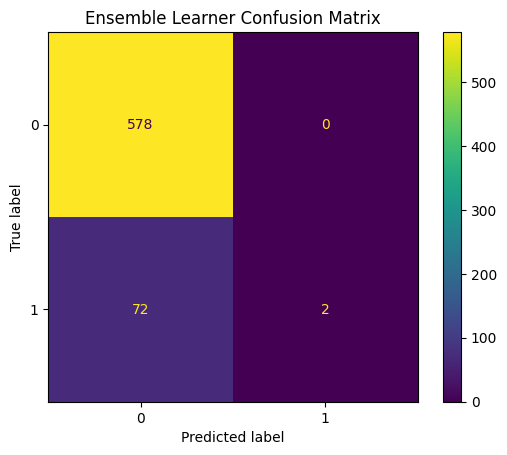

In [16]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

ensemble_learner_cm_test = confusion_matrix(y_test, y_pred_ensemble_learner,
                                            labels=ensemble_learner.classes_)

ensemble_learner_disp = ConfusionMatrixDisplay(ensemble_learner_cm_test,
                                               display_labels=ensemble_learner.classes_)

ensemble_learner_disp.plot()

ensemble_learner_disp.ax_.set_title("Ensemble Learner Confusion Matrix")

In [17]:
from sklearn.metrics import classification_report

print("Ensemble Learner Classification Report \n", classification_report(y_test, y_pred_ensemble_learner))

Ensemble Learner Classification Report 
               precision    recall  f1-score   support

           0       0.89      1.00      0.94       578
           1       1.00      0.03      0.05        74

    accuracy                           0.89       652
   macro avg       0.94      0.51      0.50       652
weighted avg       0.90      0.89      0.84       652



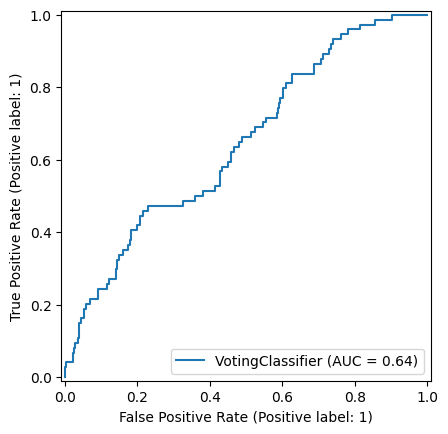

In [18]:
from sklearn.metrics import RocCurveDisplay

ensemble_learner = RocCurveDisplay.from_estimator(ensemble_learner, X_test, y_test)

In [20]:
import pandas as pd

In [49]:
data = pd.read_csv('/content/drive/MyDrive/reg_dataset.csv')

In [50]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 369 entries, 0 to 368
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     369 non-null    float64
 1   Sex                     369 non-null    int64  
 2   T_Stage                 369 non-null    int64  
 3   N_Stage                 369 non-null    int64  
 4   6th_Stage               369 non-null    int64  
 5   Differentiated          369 non-null    int64  
 6   Grade                   369 non-null    int64  
 7   A_Stage                 369 non-null    int64  
 8   Tumor_Size              369 non-null    float64
 9   Estrogen_Status         369 non-null    int64  
 10  Progesterone_Status     369 non-null    int64  
 11  Regional_Node_Examined  369 non-null    float64
 12  Reginol_Node_Positive   369 non-null    float64
 13  Survival_Months         369 non-null    int64  
 14  Mortality_Status        369 non-null    in

In [51]:
X = data.drop('Survival_Months', axis=1)
y = data['Survival_Months']

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [53]:
from sklearn.tree import DecisionTreeRegressor

In [54]:
DT_regressor = DecisionTreeRegressor()
DT_regressor.fit(X_train, y_train)

DecisionTreeRegressor()

In [55]:
y_pred = DT_regressor.predict(X_test)

In [56]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('R2:', metrics.r2_score(y_test, y_pred))

MAE: 27.27027027027027
MSE: 1136.5405405405406
R2: -0.9659026836956353


In [57]:
from sklearn import tree
from matplotlib import pyplot as plt

In [58]:
Tree_figure = plt.figure(figsize=(200,200))
DT_Graph = tree.plot_tree(DT_regressor, feature_names=list(X_train.columns), filled=True)

In [61]:
Tree_figure.savefig("decistion_tree.svg")

In [62]:
DT_regressor = DecisionTreeRegressor(max_depth=5)
DT_regressor.fit(X_train, y_train)
y_pred = DT_regressor.predict(X_test)